# Rarefaction analysis
* Evaluate sampling of the community at sequencing depth

In [1]:
figDir = '~/Hyphosphere/data/3Exp/figures'

work_dir = '~/Hyphosphere/data/3Exp/DESeq'

# phyloseq - full object without tree (includes archaea)
physeq_file = '~/Hyphosphere/data/3Exp/phyloseq/3Exp_phyloseq_thresh_woTree_experimental_woContam.rds'

In [8]:
library(RColorBrewer)
library(vegan)
library(ggpubr)
library(phyloseq)
library(gridExtra)
library(ggplot2)
library(tidyr)
library(dplyr)
library(reshape2)


Warning message:
“package ‘vegan’ was built under R version 3.6.1”Loading required package: permute
Warning message:
“package ‘permute’ was built under R version 3.6.1”Loading required package: lattice
Warning message:
“package ‘lattice’ was built under R version 3.6.1”This is vegan 2.5-5


In [3]:
theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
    }

In [4]:
ps = readRDS(physeq_file) 
ps
ps = ps %>% subset_taxa(., !is.na(Phylum)) %>%
    # remove non-experimental controls
    
    subset_samples(., SampleType != "GV") 
    # T0R1 has all NaN for some reason
    #subset_samples(!Sample == "T0R1") #%>%
     # re-normalize after subsetting taxa
    #transform_sample_counts(., function(x) x/sum(x))
sample_data(ps)$Rep = as.factor(sample_data(ps)$Rep)

ps


                                  


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 19433 taxa and 385 samples ]
sample_data() Sample Data:       [ 385 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 19433 taxa by 6 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 18876 taxa and 384 samples ]
sample_data() Sample Data:       [ 384 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 18876 taxa by 6 taxonomic ranks ]

### Generate rarefaction curves by sample type

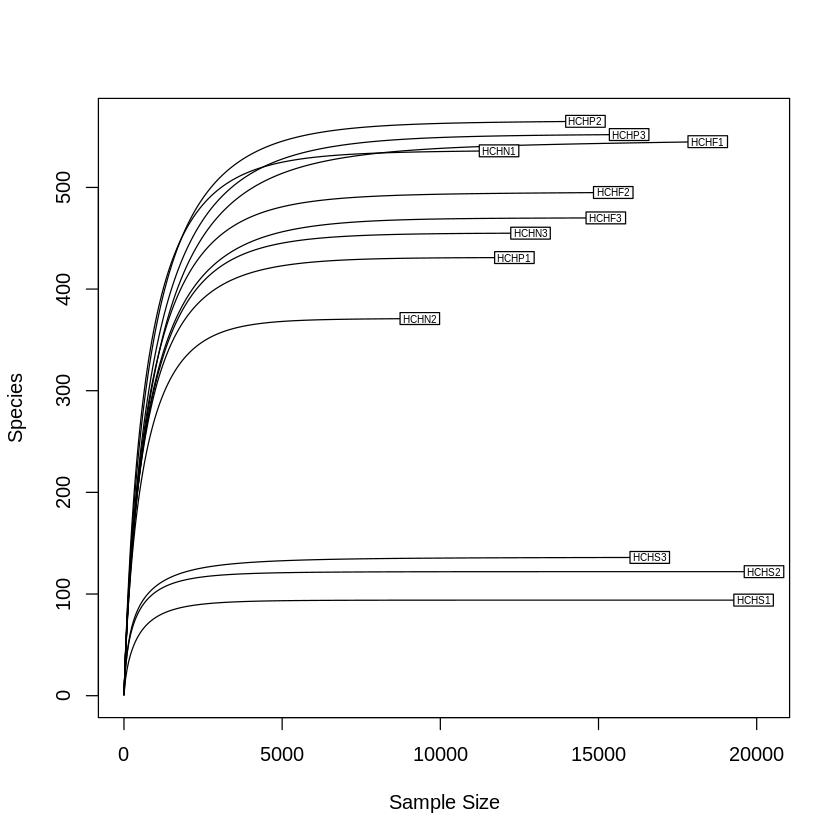

In [14]:
tmp = ps %>% subset_samples(., SampleType == "CH" & Experiment == 1)
rarecurve(otu_table(tmp),step = 50, cex = 0.5)

In [16]:
head(rare)

OTU,raw.read
1.00000,1
90.47658,101
167.45630,201
236.05384,301
297.98457,401
354.38165,501
406.08519,601
453.74738,701
497.88820,801
538.93032,901


ERROR: Error in map_dfr(rare, function(x) {: could not find function "map_dfr"


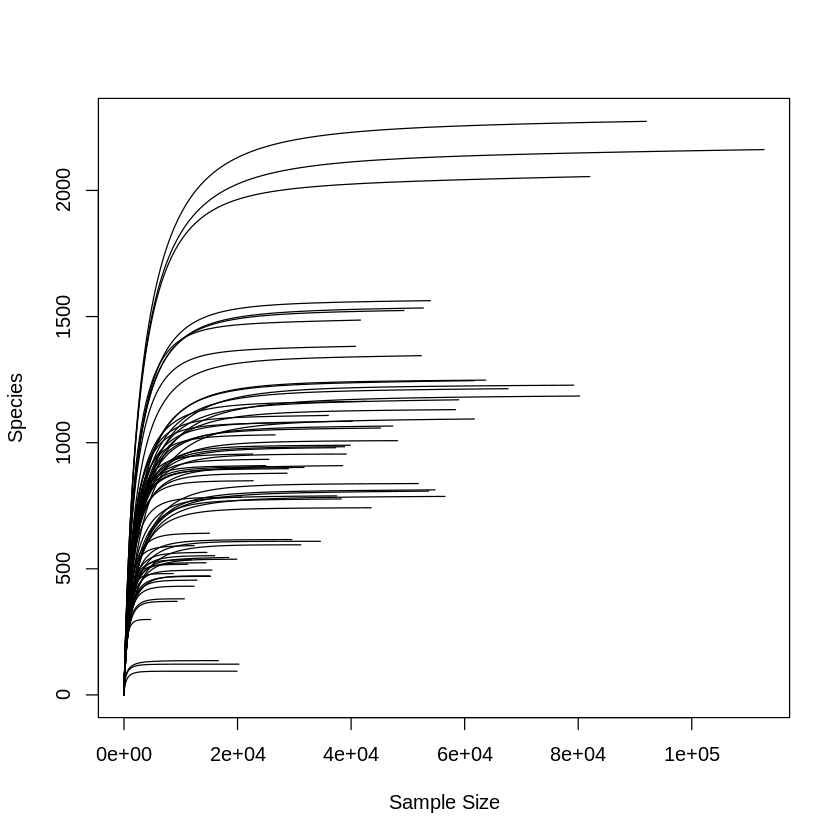

In [18]:
tmp = ps %>% subset_samples(., SampleType == "CH")
otu <- as.data.frame(tmp@otu_table)
sample_names <- rownames(tmp@otu_table)

out <- rarecurve(otu, 100,label=F)

rare <- lapply(out, function(x){
  b <- as.data.frame(x)
  b <- data.frame(OTU = b[,1], raw.read = rownames(b))
  b$raw.read <- as.numeric(gsub("N", "",  b$raw.read))
  return(b)
})
names(rare) <- sample_names

rare <- map_dfr(rare, function(x){
  z <- data.frame(x)
  return(z)
}, .id = "sample")

rare$id <- NA
for(i in rare$sample){
  x <- design_raw[i,]$Sample
  rare[rare$sample==i,]$id <- x
}

In [ ]:

# otu <- as.data.frame(t(ps@otu_table))
# sample_names <- colnames(ps@otu_table)

# out <- rarecurve(otu, 100,label=F)

# rare <- lapply(out, function(x){
#   b <- as.data.frame(x)
#   b <- data.frame(OTU = b[,1], raw.read = rownames(b))
#   b$raw.read <- as.numeric(gsub("N", "",  b$raw.read))
#   return(b)
# })
# names(rare) <- sample_names

rare <- map_dfr(rare, function(x){
  z <- data.frame(x)
  return(z)
}, .id = "sample")

rare$id <- NA
for(i in rare$sample){
  x <- design_raw[i,]$Sample
  rare[rare$sample==i,]$id <- x
}